#DERS- 9: KEŞİFSEL VERİ ANALİZİ 

Bu kavram aslında var olan verinin içinde yatan cevheri nasıl daha kolay görebileceğimiz hususunu içerir. Görselleştirme temel uygulamalarından biridir. Temel amaç verinin büyük resminin ortaya konmasıdır. Görselleştirme ile dha kolay analiz edilebilir hale getirilen veri üzerinde, çalışma amacına göre diğer prosesler için yol haritası çok daha rahat oluşturulabilir. 

Günümüzde veri tipleri genel olarak Satır ve sütunlardan oluşan matris tipli listelerdir. Bu tür verileri de çeşitli grafikleme yöntemleri ile çizdirebilip, veride ne olup ne bittiğini görebiliyoruz. Bunlar temel x y dağılımları, bar grafikler, histogramlar vs. üzerinden yapılır... 

Yani; sahip olduğunuz verileri anladığınızda, bir sonraki adım veri öğeleri arasındaki ilişkileri aramaya başlamaktır . Buna keşif veri analizi denir ve genellikle değişkenler arasındaki korelasyona odaklanır.

Hadi gelin Kaggle' dan çektiğimiz bir veri setine, bu bahsettiğimiz olayları yapalım. Kod yazmaya biraz daha alışalım..

Detaylı okumalar ve ekstra kod pretiği için 
https://medium.com/@mbektas/python-i%CC%87le-ke%C5%9Fifsel-veri-analizi-d8a636102954

In [ ]:
# Veri Setine burdan ulaşabilirsiniz.. https://www.kaggle.com/jenisam/logistic-regression-carsprice

#Şimdi öncelikle kullanacağımız kütüphaneleri import edelim..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [ ]:
#Şimdi dataseti yüklüyoruz 
dfcar=pd.read_csv('carPrice.csv',index_col=0)
dfcar.head()

,symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#Analiz yapmadan önce verileri açıkça anlamak gerekir. Veri çeşitli türlere sahiptir. ‘Object’, ‘float’, ‘int’, ‘DataTime’ gibi. Veri türlerini kontrol etmeliyiz. Çünkü sayısal değer içermesini beklediğimiz “price” sütununa ‘object ‘veri tipinin atanması tuhaf olacaktır.

In [ ]:
#Veriye ait temel bilgiler
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null int64
carCompany          205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [ ]:
#Tamamlayıcı istatistik düzeltmeleri 
pd.options.display.float_format = '{:.3f}'.format
dfcar.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,0.834,98.757,174.049,65.908,53.725,2555.566,126.907,3.330,3.255,10.143,104.117,5125.122,25.220,30.751,13276.711
std,1.245,6.022,12.337,2.145,2.444,520.680,41.643,0.271,0.314,3.972,39.544,476.986,6.542,6.886,7988.852
min,-2.000,86.600,141.100,60.300,47.800,1488.000,61.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000
25%,0.000,94.500,166.300,64.100,52.000,2145.000,97.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000,7788.000
50%,1.000,97.000,173.200,65.500,54.100,2414.000,120.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10295.000
75%,2.000,102.400,183.100,66.900,55.500,2935.000,141.000,3.580,3.410,9.400,116.000,5500.000,30.000,34.000,16503.000
max,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000


In [ ]:
#Data Temizleme 
#kayıp değerlerin sayısını ve sütun içerisindeki yüzdelerini ‘Pandas’ ın concat( ) metodunu kullanarak aynı tablo üzerinde görebiliriz.

pd.concat([dfcar.isnull().sum(), 100 * dfcar.isnull().sum()/len(dfcar)], 
            axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})

,Missing Records,Percentage (%)
symboling,0,0.000
carCompany,0,0.000
fueltype,0,0.000
aspiration,0,0.000
doornumber,0,0.000
carbody,0,0.000
drivewheel,0,0.000
enginelocation,0,0.000
wheelbase,0,0.000
carlength,0,0.000


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


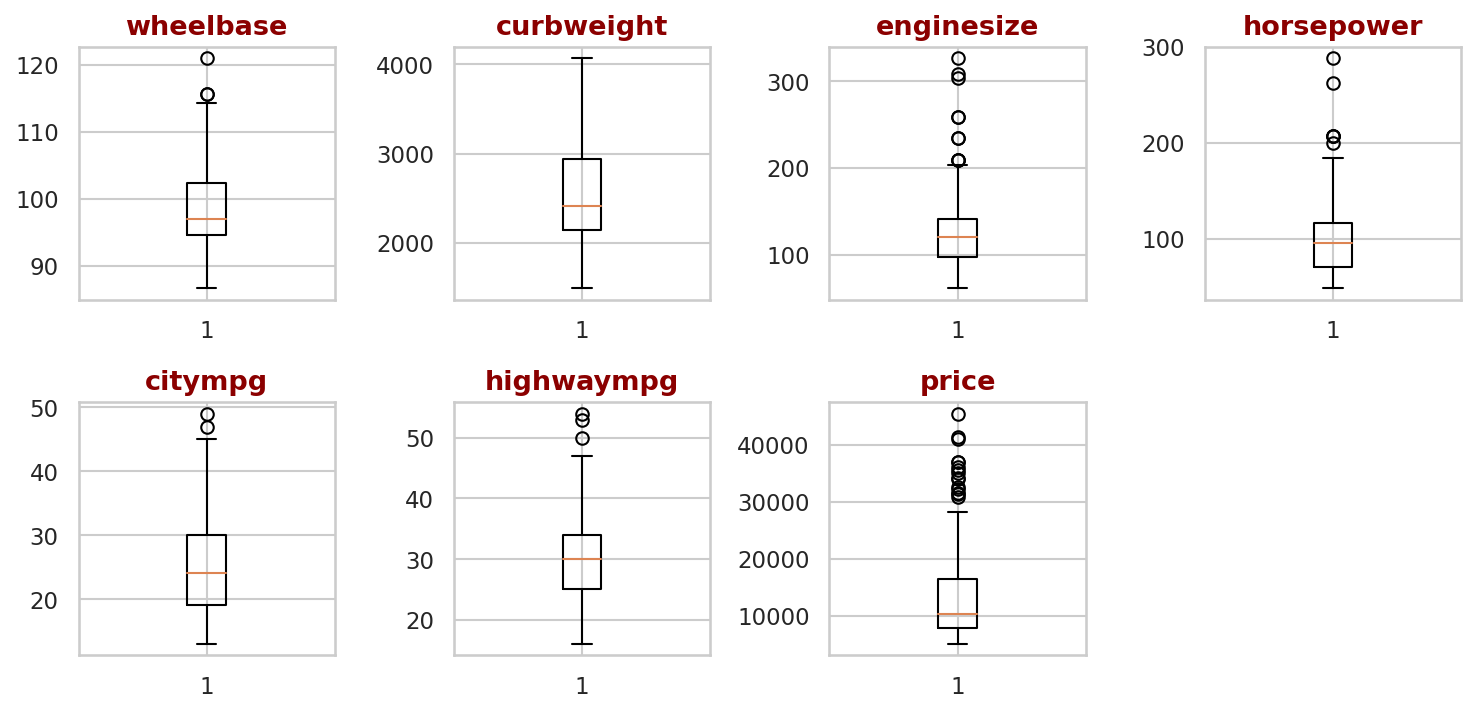

In [ ]:
#Aykırı Değer Ayıklama 

baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(10,7),dpi=150)
fill_list=['wheelbase','curbweight','enginesize','horsepower','citympg','highwaympg','price']
for i,col in enumerate(fill_list):
    plt.subplot(3,4,i+1)
    plt.boxplot(col, data=dfcar)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

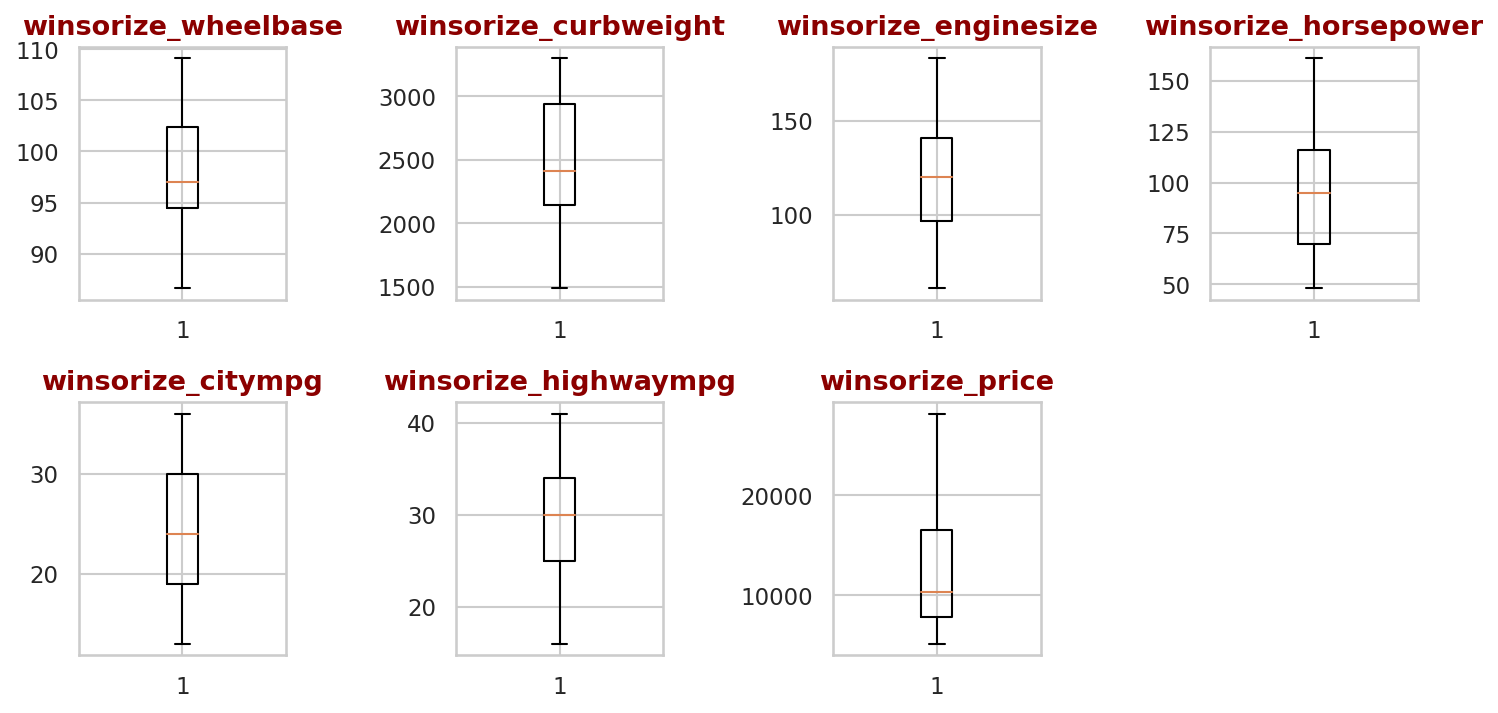

In [ ]:

from scipy.stats.mstats import winsorize
dfcarw=pd.DataFrame()
for col in fill_list:
    dfcarw['winsorize_%s'%col]=winsorize(dfcar[col],(0,0.08))
plt.figure(figsize=(10,7),dpi=150)
for i,col in enumerate(dfcarw.columns):
    plt.subplot(3,4,i+1)
    plt.boxplot(col, data=dfcarw)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

# Çoğu model yalnızca sayısal veriler üzerinde çalışacağından, metin değerli kategorik verilerimizi sayısal bir değere dönüştürmemiz gerekir. Bu amaç için iki yöntem kullanılmaktadır. Bunlar ‘Label Encoder’ ve ‘One Hot Encoder’ dır. Biz burada kategorik değişkenlerin az olması ve sütun sayısının fazla olmamasından dolayı ‘One Hot Encoder’ yöntemini kullanacağız. ‘One Hot’ kodlamada, X seviyeli kategorik bir değişkenden bilgi edinmek için, her biri 1 veya 0 kodlanan X-1 adet sayısal özellik yaratırız. Her kategori için 0 veya 1 alan sonuç değişkenleri ‘dummy’ veya gösterge değişkenler olarak bilinir. ‘One-hot’ kodlamayı kategorik bir değişkene uygulamak için ‘Pandas’ ın ‘get_dummies()’ metodunu kullanabiliriz.

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


ERROR! Session/line number was not unique in database. History logging moved to new session 59


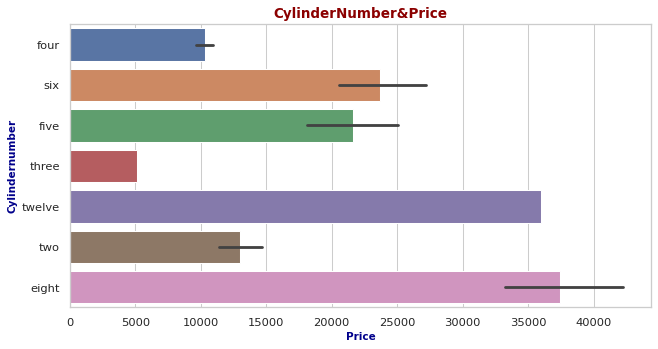

In [ ]:
#Veriyi Görselleştirelim
plt.figure(figsize=(10,5),dpi=75)
sns.barplot(dfcar.price,dfcar.cylindernumber)
plt.title('CylinderNumber&Price',fontdict=baslik_font)
plt.xlabel('Price',fontdict=eksen_font)
plt.ylabel('Cylindernumber',fontdict=eksen_font)
plt.show()

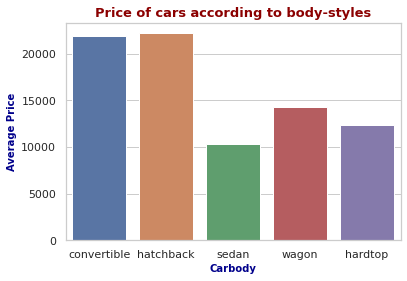

In [ ]:
sns.barplot(dfcar['carbody'].unique(),dfcar.groupby(dfcar['carbody']).price.mean())
plt.title('Price of cars according to body-styles',fontdict=baslik_font)
plt.ylabel('Average Price',fontdict=eksen_font)
plt.xlabel('Carbody',fontdict=eksen_font)
plt.show()

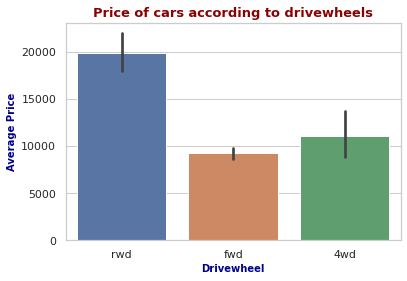

In [ ]:
sns.barplot(dfcar.drivewheel,dfcar.price)
plt.title('Price of cars according to drivewheels',fontdict=baslik_font)
plt.ylabel('Average Price',fontdict=eksen_font)
plt.xlabel('Drivewheel',fontdict=eksen_font)
plt.show()

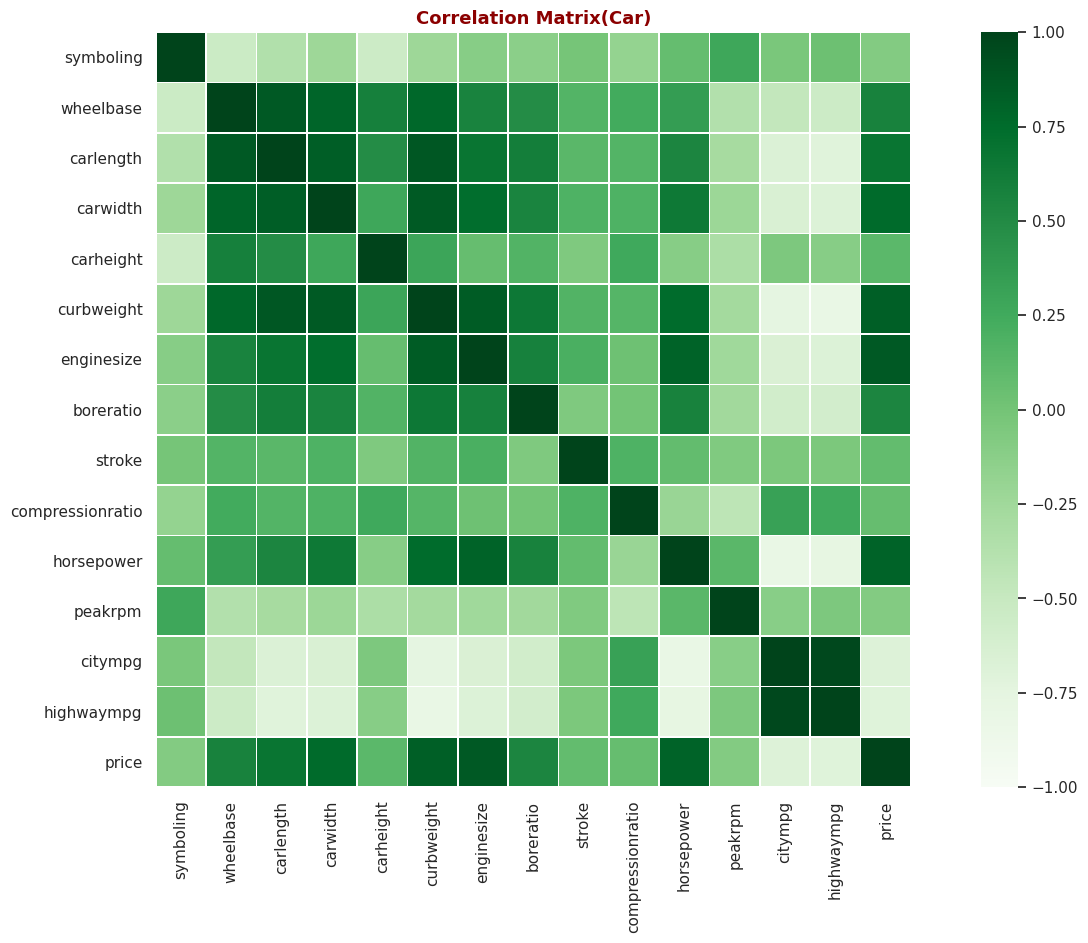

In [ ]:

plt.figure(figsize=(18,10),dpi=100)
sns.heatmap(dfcar.corr(),square=True,annot=False,
            linewidths=.5,vmin=-1,vmax=1,cmap='Greens')
plt.title('Correlation Matrix(Car)',fontdict=baslik_font)
display()